In [1]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena=img.open('/Users/wangyiyao/NTU-CV/lena.bmp')
lena_arr = np.asarray(lena)

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [61]:
m=[0]*256
for i in range(512):
    for j in range(512):
        m[lena_arr[i][j]]+=1

In [36]:
cdf=[m[0]]*256
for i in range(1,256):
    cdf[i]=m[i]+cdf[i-1]

<BarContainer object of 256 artists>

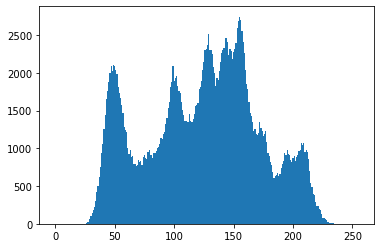

In [16]:
plt.bar(x=[i for i in range(256)],height=m,width=1)

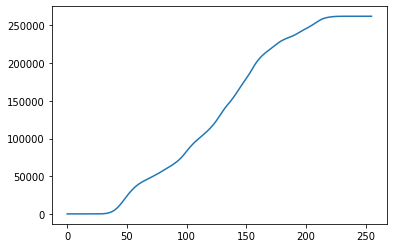

In [37]:
plt.plot(cdf)

In [41]:
HW3_b=np.array([[i//3 for i in j] for j in lena_arr],dtype='uint8')

In [64]:
mb=[0]*256
for i in range(512):
    for j in range(512):
        mb[HW3_b[i][j]]+=1

<BarContainer object of 256 artists>

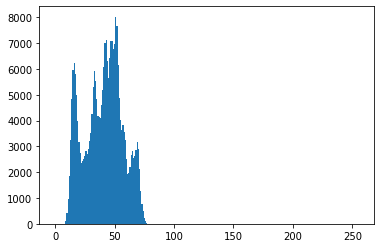

In [65]:
plt.bar(x=[i for i in range(256)],height=mb,width=1)


In [81]:
cdf=[mb[0]]*256
for i in range(1,256):
    cdf[i]=mb[i]+cdf[i-1]

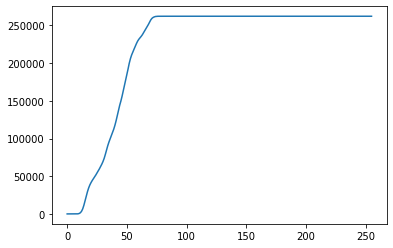

In [82]:
plt.plot(cdf)

In [53]:
step=(512*512)//256
bound=step
newcdf=[0]*256
idx=0
d={}
while newcdf[0]<bound:
        newcdf[0]+=m[idx]
        d[idx]=0
        idx+=1

for i in range(1,256):
    newcdf[i]=newcdf[i-1]
    bound+=step
    while newcdf[i]<bound:
        newcdf[i]+=m[idx]
        d[idx]=i
        idx+=1
while idx<256:
    newcdf[i]+=m[idx]
    d[idx]=i
    idx+=1
        


        

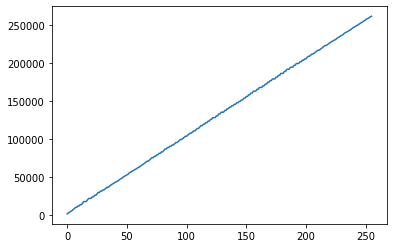

In [55]:
plt.plot(newcdf)

In [28]:
newlena=np.array([[d[i] for i in j] for j in lena_arr],dtype='uint8')

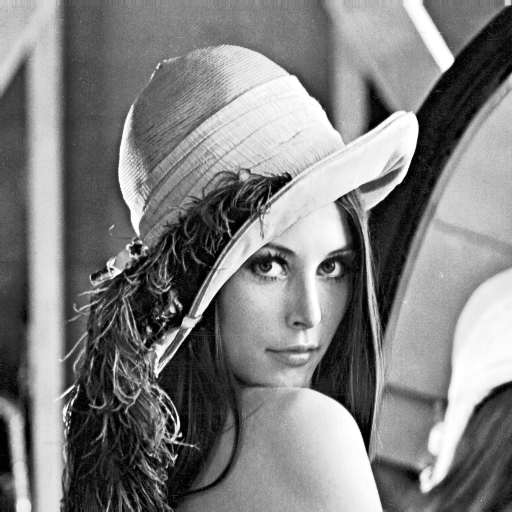

In [29]:
img.fromarray(newlena)

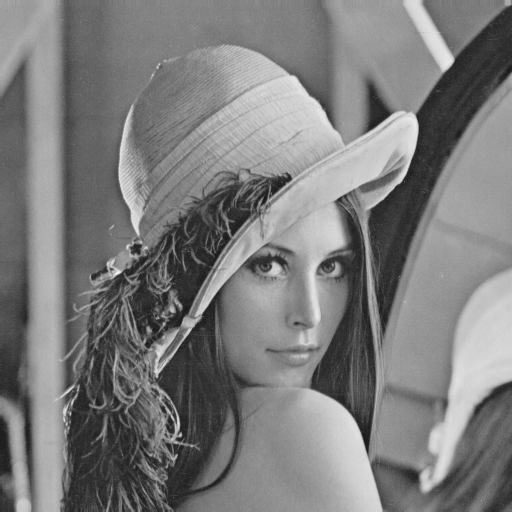

In [30]:
img.fromarray(lena_arr)

In [32]:
newm=[0]*256
for i in range(512):
    for j in range(512):
        newm[newlena[i][j]]+=1

<BarContainer object of 256 artists>

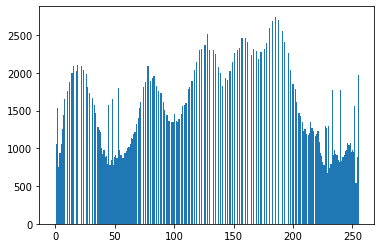

In [38]:
plt.bar([i for i in range(256)],newm,width=1)

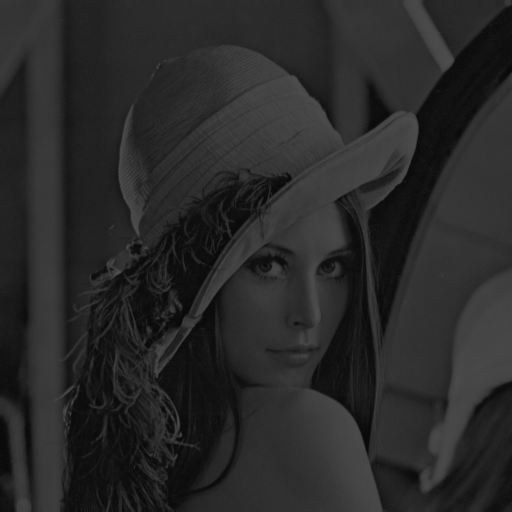

In [42]:
img.fromarray(HW3_b)

In [66]:
step=(512*512)//256
bound=step
newcdf=[0]*256
idx=0
db={}
while newcdf[0]<bound:
        newcdf[0]+=mb[idx]
        db[idx]=0
        idx+=1

for i in range(1,256):
    newcdf[i]=newcdf[i-1]
    bound+=step
    while newcdf[i]<bound:
        newcdf[i]+=mb[idx]
        db[idx]=i
        idx+=1
while idx<256:
    newcdf[i]+=mb[idx]
    db[idx]=i
    idx+=1

In [74]:
lenac=np.array([[db[i] for i in j] for j in HW3_b],dtype='uint8')

In [75]:
newmc=[0]*256
for i in range(512):
    for j in range(512):
        newmc[lenac[i][j]]+=1

<BarContainer object of 256 artists>

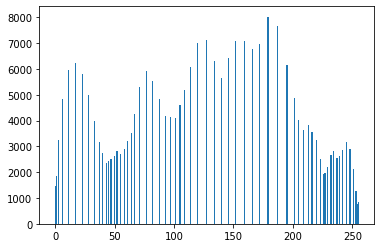

In [83]:
plt.bar([i for i in range(256)],newmc,width=1)

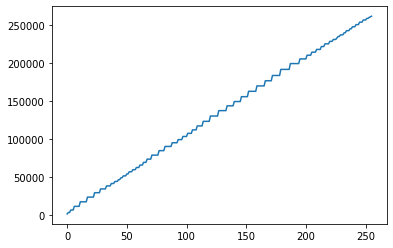

In [73]:
plt.plot(newcdf)

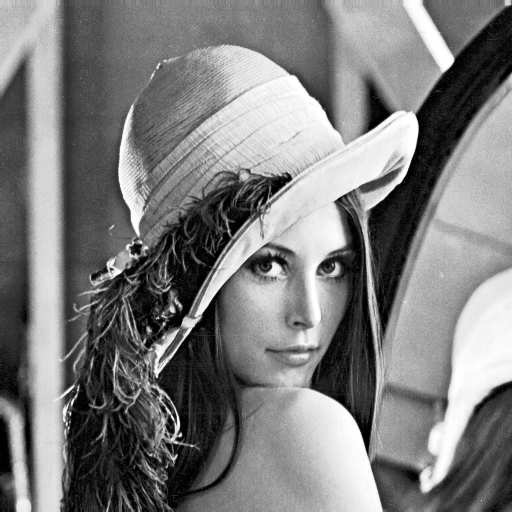

In [77]:
img.fromarray(lenac)

In [1]:
def equalizaton(lena):
    mb=[0]*256
    for i in range(len(lena)):
        for j in range(len(lena[0])):
            mb[lena[i][j]]+=1
    step=(len(lena)*len(lena[0]))//256
    bound=step
    newcdf=[0]*256
    idx=0
    db={}
    while newcdf[0]<bound:
            newcdf[0]+=mb[idx]
            db[idx]=0
            idx+=1

    for i in range(1,256):
        newcdf[i]=newcdf[i-1]
        bound+=step
        while newcdf[i]<bound:
            newcdf[i]+=mb[idx]
            db[idx]=i
            idx+=1
    while idx<256:
        newcdf[i]+=mb[idx]
        db[idx]=i
        idx+=1
    res=np.array([[db[i] for i in j] for j in lena],dtype='uint8')
    return res